In [1]:
#! pip install zarr s3fs
#! pip install climetlab_s2s_ai_challenge --quiet

In [2]:
import climetlab as cml 

/home/mafp/.conda/envs/dev8/lib/python3.8/site-packages/ecmwflibs.libs/libMagPlus-887d8f5c.so


In [3]:
import climetlab_s2s_ai_challenge
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-challenge plugin version : {climetlab_s2s_ai_challenge.__version__}')

Climetlab version : 0.4.4
Climetlab-s2s-ai-challenge plugin version : 0.4.0


# Using Zarr data

In [4]:
import pandas as pd
date=pd.date_range(start="2020-01-02", end="2020-12-31", freq="w-thu")
#date = [d.strftime('%Y%m%d') for d in date]
date = [d.to_numpy() for d in date]

In [5]:
import numpy as np
date = [np.datetime64('2020-01-02'),'2020-01-09','20200116']
date

[numpy.datetime64('2020-01-02'), '2020-01-09', '20200116']

Let us get the zarr pointer to the data for realtime data. The "date" argument also accept lists of values.

In [6]:
rt_tp = cml.load_dataset("s2s-ai-challenge-training-set",
                         parameter='tp',                         
                         #hindcast=True, 
                         format='zarr').to_xarray()
rt_tp

By downloading data from this dataset, you agree to the terms and conditions defined at https://apps.ecmwf.int/datasets/data/s2s/licence/. If you do not agree with such terms, do not download the data. 


/home/mafp/.conda/envs/dev8/lib/python3.8/site-packages/xarray/core/dataset.py:413: UserWarning: Specified Dask chunks (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1) would separate on disks chunk shape 2 for dimension forecast_time. This could degrade performance. Consider rechunking after loading instead.
  _check_chunks_compatibility(var, output_chunks, preferred_chunks)
/home/mafp/.conda/envs/dev8/lib/python3.8/site-packages/xarray/core/dataset.py:413: UserWarning: Specified Dask chunks (48, 3) would separate on disks chunk shape 51 for dimension realization. This could degrade performance. Consider rechunking after loading instead.
  _check_chunks_compatibility(var, output_chunks, preferred_chunks)
/home/mafp/.conda/envs/dev8/lib/python3.8/site-packages/xarray/core/dataset.py:413: UserWarning: Specified Dask chunks (45, 2) would separate on disks chunk shape 47 for dimen

<xarray.Dataset>
Dimensions:        (forecast_time: 53, latitude: 121, lead_time: 47, longitude: 240, realization: 51)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * lead_time      (lead_time) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    surface        (forecast_time) int64 dask.array<chunksize=(53,), meta=np.ndarray>
    time           (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(53, 47), meta=np.ndarray>
    tp             (forecast_time, realization, lead_time, latitude, longitude) float32 dask.array<chunksize=(1, 48, 45, 121, 120), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-02-16T07:09:48 GRIB to CDM+CF via cfgrib-0....
    institution:             European Centre for Medium-Range Weather Forecasts

In [14]:
t2m = cml.load_dataset("s2s-ai-challenge-training-set",
                         parameter='2t',
                         fctype='forecast',
                         format='zarr').to_xarray()
t2m

<xarray.Dataset>
Dimensions:        (forecast_time: 53, latitude: 121, lead_time: 46, longitude: 240, realization: 51)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * lead_time      (lead_time) timedelta64[ns] 1 days 2 days ... 45 days 46 days
Data variables:
    t2m            (forecast_time, realization, lead_time, latitude, longitude) float32 dask.array<chunksize=(1, 51, 23, 121, 120), meta=np.ndarray>
    time           (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(53, 46), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-02-15T16:18:08 GRIB to CDM+CF via cfgrib-0....
    institution:             European Centre for Medium-Range Weather Forecasts

Hindcast data would be retrieved with hindcast=True (but they have not been uploaded yet).

In [15]:
#t2m_hc = cml.load_dataset("s2s-ai-challenge-reference-set",
#                         parameter='2t',
#                         version='0.1.20',
#                         hindcast=True,
#                         format='zarr').to_xarray()

### Computing average and plotting

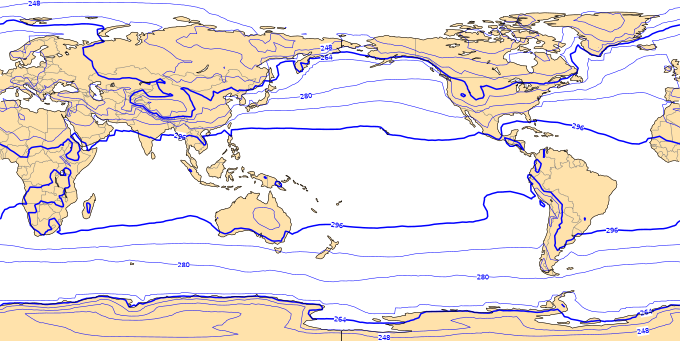

In [17]:
mean1 = t2m.mean(dim="lead_time")
m1 = mean1.isel(forecast_time=0, realization=0).squeeze().compute()
cml.plot_map(m1)

In [ ]:
mean2 = t2m.mean(dim="forecast_time")
m2 = mean2.isel(lead_time=20, realization=0).squeeze().compute()
cml.plot_map(m2)

In [ ]:
mean3 = t2m[['t2m','valid_time']].groupby('valid_time').mean()['t2m']
m3 = mean3.isel(realization=0, valid_time=0).squeeze().compute()
cml.plot_map(m3)